# Deep Network ve Back Propagation


Bu konuyu bir örnek üzerinde açıklayacağım. Farz edelim ki yayalar caddede karşıdan karşıya geçerken bir çeşit trafik lambasına göre hareket ediyor. Trafik lambası aşağıdaki gibi üzerinde üç lambadan oluşan bir düzenek olsun, bu lambalar aynı anda yanabiliyor. Hangileri yandığında durmalısınız, hangi kombinasyonlarda geçmelisiniz bunun kuralını siz biliyor olabilirsiniz. Fakat bilgisayara bu kuralı açıkça anlatmak yerine makine öğrenmesi yöntemleriyle durmaya veya geçmeye karar vermesini öğreteceksiniz.

![](img/deep_learning_7.jpg)

Bunun için biraz gözlem yaptınız. Bir süre boyunca lambaların çeşitli kombinasyonlarını ve bunlara karşın insanların ne yaptığını not alın. Mesela altı farklı kombinasyon için insanların durduğunu veya geçtiğini not aldınız ve aşağıdaki gibi bir tablo oluşturdunuz diyelim.

![](img/deep_learning_8.jpg)

Burada lambaların ve insanların durumlarını kodladık ayrıca; lambanın yanmasını `1`, yanmamasını `0`, insanların geçmesini `1` ve durmasını `0` ile kodladık. Mesela trafik lambası `0 1 1` (input) iken insanlar `1` (output) olmuş (yürümüş).

Şimdi dataset (gözlem tablomuz) içindeki ilk veriyi kullanarak daha önce öğrendiğimiz yöntemle bir sinir ağı oluşturup  çalıştıralım.

In [1]:
import numpy as np

weights = np.array([0.5, 0.48, -0.7]) #random
alpha = 0.01

streetlights = np.array( [ [ 1, 0, 1 ],
                           [ 0, 1, 1 ],
                           [ 0, 0, 1 ],
                           [ 1, 1, 1 ],
                           [ 0, 1, 1 ],
                           [ 1, 0, 1 ] ] )

walk_stop = np.array( [0, 1, 0, 1, 1, 0] )

input = streetlights[0] # [1,0,1]
truth = walk_stop[0] # 0, yani "stop"

for iteration in range(20):
    prediction = input.dot(weights)
    error = (truth - prediction)**2
    delta = prediction - truth
    weights = weights - (alpha*(input*delta)) #gradient descent
    print("Error:" + str(error) + " Prediction:" + str(prediction))

Error:0.03999999999999998 Prediction:-0.19999999999999996
Error:0.03841599999999998 Prediction:-0.19599999999999995
Error:0.03689472640000001 Prediction:-0.19208000000000003
Error:0.03543369523456005 Prediction:-0.18823840000000014
Error:0.03403052090327151 Prediction:-0.18447363200000022
Error:0.03268291227550193 Prediction:-0.18078415936000014
Error:0.031388668949392025 Prediction:-0.17716847617280007
Error:0.030145677658996135 Prediction:-0.17362510664934416
Error:0.028951908823699888 Prediction:-0.17015260451635728
Error:0.02780541323428135 Prediction:-0.16674955242603007
Error:0.02670431887020383 Prediction:-0.16341456137750954
Error:0.02564682784294378 Prediction:-0.1601462701499594
Error:0.024631213460363184 Prediction:-0.15694334474696015
Error:0.023655817407332785 Prediction:-0.1538044778520209
Error:0.022719047038002375 Prediction:-0.15072838829498036
Error:0.02181937277529745 Prediction:-0.14771382052908066
Error:0.02095532561339566 Prediction:-0.144759544118499
Error:0.0201

Şimdi bir de benzer bir sinir ağıyla dataset içinden tek bir veri yerine tüm dataset üzerinden öğrenme yapalım. Bunu yapmak basittir, sırasıyla tüm input değerleri için ayrı ayrı sinir ağı tahminde bulunur ve hataya göre her adımda weight değerlerini günceller. Bu şekilde her adımda ayrı bir input ile öğrenerek tüm dataseti öğrenme yöntemine ***stochastic gradient descent*** yöntemi denir. Daha önce gradient descent yöntemi ile veri setinin tek bir seferde öğrenildiğini biliyoruz, bu yöntemle weight değerleri tek seferde güncellenir; fakat stochastic gradient descent ile her adımda weight değerleri güncellenir. Daha sonra değineceğiz ama bu ikisinin (tek seferde tüm veri setini öğrenme ile inputları teker teker öğrenme, yani gradient descent ve stochastic gradient descent) arasında başka bir yol daha vardır. Bu yöntemde kaç adımda bir weight değerlerinin güncelleneceği bir ***batch size*** değeri belirleriz.

In [5]:
import numpy as np

weights = np.array([0.5,0.48,-0.7])
alpha = 0.1

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

walk_stop = np.array( [0, 1, 0, 1, 1, 0] )

input = streetlights[0] # [1,0,1]
goal_prediction = walk_stop[0] # 0

for iteration in range(40):
    error_total = 0
    for i in range(len(walk_stop)):
        input = streetlights[i]
        truth = walk_stop[i]
        prediction = input.dot(weights)
        error = (truth - prediction)**2
        error_total += error
        delta = prediction - truth
        weights = weights - (alpha*(input*delta)) #stochastic gradient descent
        print("Weights: " + str(weights) + ",\t Prediction:" + str(prediction))
    print("Error:" + str(error_total) + "\n")

Weights: [ 0.52  0.48 -0.68],	 Prediction:-0.19999999999999996
Weights: [ 0.52  0.6  -0.56],	 Prediction:-0.19999999999999996
Weights: [ 0.52   0.6   -0.504],	 Prediction:-0.5599999999999999
Weights: [ 0.5584  0.6384 -0.4656],	 Prediction:0.6160000000000001
Weights: [ 0.5584   0.72112 -0.38288],	 Prediction:0.17279999999999995
Weights: [ 0.540848  0.72112  -0.400432],	 Prediction:0.17552
Error:2.6561231104

Weights: [ 0.5268064  0.72112   -0.4144736],	 Prediction:0.14041599999999999
Weights: [ 0.5268064   0.79045536 -0.34513824],	 Prediction:0.3066464
Weights: [ 0.5268064   0.79045536 -0.31062442],	 Prediction:-0.34513824
Weights: [ 0.52614267  0.78979163 -0.31128815],	 Prediction:1.006637344
Weights: [ 0.52614267  0.84194128 -0.2591385 ],	 Prediction:0.4785034751999999
Weights: [ 0.49944225  0.84194128 -0.28583891],	 Prediction:0.26700416768
Error:0.9628701776715985

Weights: [ 0.47808192  0.84194128 -0.30719925],	 Prediction:0.213603334144
Weights: [ 0.47808192  0.88846708 -0.2606734

Yukarıdaki programın çıktısını incelerseniz weight değerlerinden ilk ve üçüncü lambanın değeri sıfıra, ortadaki lambanın weight değeri ise bire yakınsıyor. Gerçekten gözlem tablonuzu incelerseniz bunu anlamlandırabilirsiniz; zira ortadaki lamba yanıyorsa yürüyebilirsiniz, yanmıyorsa beklersiniz. Sonucu sadece ortadaki lamba belirliyor!

![](img/deep_learning_12.jpg)

Dolayısıyla sinir ağımız `1,0,1` input değeri ile `0` (stop) outpur değeri arasında bir ilişki kurabilecek şekilde weight değerleri aradı. Dikkat ederseniz ortadaki lambanın weight değeri sonuçta 1 olarak, diğer weight değerleri 0 olarak belirlenmiş. Bunun anlamı şudur; şinir ağımız ortadaki input ile sonuç arasında güçlü bir ilişki fark etmiş; bu ilişkiye istatistiksel olarak **korelasyon** diyoruz. Yüksek korelasyona sahip çiftler arasında yüksek weight değerleri oluşur, düşük korelasyonlu (yani ilişki belirtmeyen rastgele dağılımlı) çiftler arasında da düşük weight parametreleri oluşur. Burda sinir ağımız ortadaki lamba ile sonuç arasında önemli bir korelasyon olduğunu belirtiyor; her adımda bu korelasyonu fark ederek gittikçe bunun değerini bire, diğerlerininkini de sıfıra yaklaştırıyor. Böylece tahmin adımında input değerlerini karşılık gelen weight değerleri ile çarpıp topladığımızda output değerine yaklaşık sonuç elde edebiliriz.

Peki korelasyona bağlı bu değişimi sinir ağımız nasıl yapabildi? Cevap *gradient descent* adımı; bu işlem her bir weight değeri üzerinde aşağı ya da yukarı yönde bir baskı oluşturur. Bu baskı sonucunda ilgili weight değeri küçülür veya büyür. Gradient descent adımında toplam hata tespit edilir ve bu hataya hangi weight değerlerinin hangi oranlarda katkıda bulunduğu tespit edilir. Daha sonra hataya katkıda bulunan weight değerleri küçültülür, katkısı olmayanlar bırakılır.


$$
\begin{array}{cccc|cccc}
%\textrm{Data}&&&&&\textrm{Weight baskısı}&&\\
\texttt{1, 0, 1} & \longrightarrow & \texttt{0} & \qquad & \qquad & \texttt{--}\quad\texttt{0}\quad\texttt{--} & \longrightarrow & \texttt{0}\\
\texttt{0, 1, 1} & \longrightarrow & \texttt{1} & \qquad & \qquad & \texttt{0}\quad\texttt{+}\quad\texttt{+} & \longrightarrow & \texttt{1}\\
\texttt{0, 0, 1} & \longrightarrow & \texttt{0} & \qquad & \qquad & \texttt{0}\quad\texttt{0}\quad\texttt{--} & \longrightarrow & \texttt{0}\\
\texttt{1, 1, 1} & \longrightarrow & \texttt{1} & \qquad & \qquad & \texttt{+}\quad\texttt{+}\quad\texttt{+} & \longrightarrow & \texttt{1}\\
\texttt{0, 1, 1} & \longrightarrow & \texttt{1} & \qquad & \qquad & \texttt{0}\quad\texttt{+}\quad\texttt{+} & \longrightarrow & \texttt{1}\\
\texttt{1, 0, 1} & \longrightarrow & \texttt{0} & \qquad & \qquad & \texttt{--}\quad\texttt{0}\quad\texttt{--} & \longrightarrow & \texttt{0}\\
\end{array}
$$

Yukarıdaki tabloda sol tarfta input ve output değerleri, sağ tarafta da ilgili weight baskısı canlandırılıyor. Mesela ilk training örneğine bakın; input (1,0,1) ve output (0) arasında korelasyonu tespit etmek için ilk ve üçüncü weight değerleri azaltılıyor, ortadaki weight değeri ise sabit bırakılıyor çünkü bu zaten sıfır (weight ne olursa olsun bununla çarpılınca etkisi olmayacak). Altı training örneğinin tamamını dikkate aldığımızda şunu fark ederiz; sağ ve sol tarafta hem pozitif hem de negatif baskılar var ve bunların tamamı bunları sıfıra doğru sürükler, ortadaki weight parametresi ise her adımda yükseltilmiş. Yani makine ortadaki lamba ile sonuç arasında sürekli korelasyon uyarısı vermiş. Sinir ağımız her adımda korelasyon bulduğu yerde weight değerini yükselterek 1'e yaklaştırmış, korelasyon görmediği (diskorelasyon) yerlerde weight değerlerini azaltmış. İşlemin sonunda da toplam olarak sinir ağı ortadaki input ile sonuç arasında güçlü bir korelasyon bulduğunu belirtmiş. Tahmin dediğimiz şeyin input ile weightlerin çarpımı olduğunu hatırlayın, bu yapılan işin mantıklı olduğunu kavrayacaksınız.

peki ya bir adımda tesadüfen hata sıfır çıkarsa? Mesela yukarıdaki tablonun ilk training örneğinde sağdaki weight değeri 0.5 ve soldaki weight değeri de -0.5 olsaydı ne olurdu? Bu durumda weight ile input çarpımı 0 olacak, yani weight değerlerini güncellemeye gerek kalmadan mükemmel tahmini (error=0) yakalamış oluruz. Weight değerleri güncellenmediği için burada öğrenme gerçekleşmemiş olur, eğer bu yakalanan hatasız tahmin tesadüfi ise makine hiç bir şey öğrenmedi ve başka inputlarda hatalı tahmin yapacak demektir. Bu olguya ***overfitting*** denir. Eğer sadece bu veriyi kullanarak öğrenme yaptıysak yanlış yaptık, peki diğer verileri kullanarak devam edersek ne olur? Bu durumda diğer input değerleri overfitting olmuyorsa weight değerlerini güncellemeye devam eder ve makine öğrenmeye devam eder. Öğrenmeyi mesela sadece ilk iki inputla yaparsanız makineyi bu iki durumu ***ezberlemeye*** (memorize) zorlamış olursunuz, bu durumda bu ikisi dışında daha genel inputlar için hatalı tahmin üreteceksiniz demektir. Amacımız inputları kullanarak çok daha genel tahmin yapabilecek genel bir kural saptamak olmalıdır (generalization).

Şimdi yukarıdaki training tablosunda bir şeye daha dikkat çekmek istiyorum. Ortadaki weight değerleri üzerinde hep pozitif baskı var ve doğal olarak bunlar artarak bire yaklaşıyor, soldaki weight değerleri üzerinde hem pozitif hem de negatif baskılar var fakat negatifler daha fazla olduğundan bu weight değeri azalarak sıfıra yaklaşıyor. Fakat sağdaki weight değeri üzerinde negatif ve pozitif baskılar eşit oranda, sinir ağında bu weight değeri sıfıra yakınsıyor. Bunun anlamı bu weight üzerindeki negatif baskıların şiddeti pozitiflere göre daha yüksek, peki bu nasıl oluşuyor? Gradient descent adımında sağ ve orta weight değerleri ideal değerlerine yaklaştıkça bunların toplam hataya katkısı azalacak ve sol weight değerinin hataya katkısı daha görünür olacaktır, dolayısıyla bundan sonra soldakinin negatif veight baskısı artacaktır. Aşağıdaki grafikte bunu gözlemleyebilirsiniz, soldaki weight değeri diğerlerine göre daha yavaş yakınsıyor.

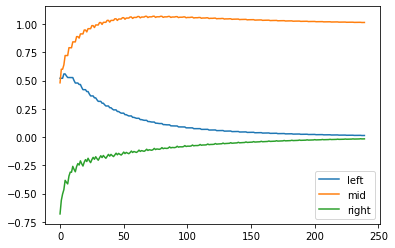

In [17]:
import numpy as np
import matplotlib.pyplot as plt

weights = np.array([0.5,0.48,-0.7])
alpha = 0.1

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

walk_stop = np.array( [0, 1, 0, 1, 1, 0] )

input = streetlights[0] # [1,0,1]
goal_prediction = walk_stop[0] # 0

wr = []
wm = []
wl = []

for iteration in range(40):
    error_total = 0
    for i in range(len(walk_stop)):
        input = streetlights[i]
        truth = walk_stop[i]
        prediction = input.dot(weights)
        error = (truth - prediction)**2
        error_total += error
        delta = prediction - truth
        weights = weights - (alpha*(input*delta)) #stochastic gradient descent
        wr.append(weights[0])
        wm.append(weights[1])
        wl.append(weights[2])
        
plt.plot(range(len(wr)), wr, range(len(wm)), wm, range(len(wl)), wl)
plt.legend(['left', 'mid', 'right'])
plt.show()

Yukarıdaki ilk training örneğinde ortadaki input böyle mükemmel bir korelasyona sahip olmasaydı sinir ağımız sağdaki weight değerini sıfıra yaklaştırmakta başarısız olabilirdi. Daha sonra ***regularization*** işlemini açıklayacağım, bu işlem aynı sayıda pozitif ve negatif baskıya sahip weight değerlerini doğrudan sıfıra yaklaşmaya zorlar. Bu işlem avantajlıdır çünkü bu sayede sadece güçlü korelasyona sahip weight değerlerini günceller, korelasyona sahip olmayanları sustururuz. Bu örnekte ortadaki input korelasyona sahip olmasaydı regularization yapmadan sağdaki weight değerini sıfırlamamız zor olabilirdi, regularization ile bu değer doğrudan sıfıra yaklaştırılır.

Şimdi aşağıdaki dataseti inceleyin, bu durumda sinir ağımız ne yapabilir?

$$
\begin{array}{cccc|cccc}
%\textrm{Data}&&&&&\textrm{Weight baskısı}&&\\
\texttt{1, 0, 1} & \longrightarrow & \texttt{1} & \qquad & \qquad & \texttt{+}\quad\texttt{0}\quad\texttt{+} & \longrightarrow & \texttt{1}\\
\texttt{0, 1, 1} & \longrightarrow & \texttt{1} & \qquad & \qquad & \texttt{0}\quad\texttt{+}\quad\texttt{+} & \longrightarrow & \texttt{1}\\
\texttt{0, 0, 1} & \longrightarrow & \texttt{0} & \qquad & \qquad & \texttt{0}\quad\texttt{0}\quad\texttt{--} & \longrightarrow & \texttt{0}\\
\texttt{1, 1, 1} & \longrightarrow & \texttt{0} & \qquad & \qquad & \texttt{--}\quad\texttt{--}\quad\texttt{--} & \longrightarrow & \texttt{0}\\
\end{array}
$$

Gördüğünüz gibi hiç bir input ile output arasında en ufak korelasyon yok, ayrıca her weight değeri eşit sayıda pozitif ve negatif baskıya sahip. Bu dataset sinir ağımız için büyük bir baş belası! Böyle bir durumda ne yapılabilir?

Eğer input dataset ile output dataset arasında hiç korelasyon yoksa yada çok düşük korelasyon varsa biz input dataseti kullanarak ara bir dataset üretiriz (farklı boyutta olabilir), bu yeni yapay dataset ile output arasında bir miktar korelasyonun var olmasını sağlarız. Böylece output ile korelasyonu bulunmayan bir dataset yerine bundan üretilmiş fakat korelasyona sahip bir dataset kullanarak training gerçekleştiririz. Sonuçta sinir ağımız üç aşamalı olur, sinir ağlarında bunlara ***katman*** (layer) deriz (burada input dataset, ara dataset ve output dataset olmak üzere üç katman var). Buradaki `layer_1` gibi ara katmanlara gizli katman (***hidden layer***) deriz.

![](img/deep_learning_13.jpg)

Yukarıda sinir ağımızın yapısı gösteriliyor; bu şekilde ikiden fazla katmana sahip sinir ağlarına ***derin sinir ağları*** (deep neural networks) denir, bu ağlarla gerçekleşen makine öğrenmesine de ***derin öğrenme*** (deep learning) denir. Bu örnekte `layer_0` ile `layer_2` arasında korelasyon yok fakat `layer_0` katmanını kullanarak ürettiğimiz `layer_1` katmanı ile `layer_2` arasında belirli bir korelasyon var, peki pratikte bu özelliğe sahip `layer_1` katmanını nasıl oluşturacağız? Bu derin sinir ağında öğrenme nasıl gerçekleşir?

Bu sorulara cevap aramak için sinir ağına daha yakından bakalım. Burada `layer_1` ile `layer_2` katmanlarından oluşan kısım daha önce defalarca train ettiğimiz bir yapıdadır; `layer_1` inputlarını alırız ve `weights_1_2` ile işleyerek tahmin üretiriz, daha sonra hatayı tespit ederek ilgili `delta` parametresine göre bir döngü içinde `weights_1_2` parametrelerini güncelleyerek training yaparız.

Burada yeni olan kısım `layer_0` ile `layer_1` katmanlarından oluşan parçadır, `weights_0_1` parametrelerini nasıl güncellemeliyiz ki `layer_0` inputlarını bu weight ile işleyince oluşan `layer_1` katmanı ve `layer_2` katmanı arasında biraz korelasyon olsun? Bu `weights_0_1` parametrelerini güncelleyebilmek için karşılık gelen `delta` (layer_1 için) parametrelerini bilmemiz gerekir, böylece gradient descent ile weight parametrelerini güncelleriz. Şimdi `layer_1` için `delta` parametrelerini nasıl tespit edebileceğimize bakalım, tüm weightlerin rastgele başlatıldığını varsayalım. Biliyoruz ki `layer_2` tahminindeki hataya `layer_1` katmanındaki yüksek weight değerine sahip inputlar daha çok katkı sağlar, dolayısıyla `layer_2` tahminini (dolayısıyla hatayı) azaltmak bir miktar istersek `layer_1` inputlarını ilgili weight değerleri oranında değiştirmemiz gerekir. Çünkü bu tahmin `layer_1` inputlarının `weight_1_2` ile işlenmesiyle elde ediliyor. Dolayısıyla `layer_1` katmanının `delta` değerlerini `layer_2` katmanının `delta` değerlerinin karşılık gelen `weights_1_2` değerleriyle çarparak tespit ederiz. Bunları kullanarak da `weights_0_1` parametrelerini güncelleyebiliriz. Yani sonuca bakarak daha gerideki katmanın nasıl değiştirileceğini belirliyoruz, tersten düşünerek geliştirdiğimiz bu yönteme ***back propagation*** denir.

Şimdi daha geniş bir pencereden sinir ağımıza bir daha bakalım. Bir input değeri (`layer_0`) ilhili bir weight değeriyle (`weights_0_1`) çarpılıp bir değer elde ediliyor (`layer_1`), daha sonra bu değer de ilgili bir weight ile (`weights_1_2`) çarpılarak output değeri (`layer_2`) sonucuna ulaşılıyor. Daha sonra bu işlem diğer input we weightler için tekrarlanıyor. Sonuç olarak input değerinden output değerine ulaşmak için iki defa farklı weight değerleri ile çarpma işlemi yapılıyor, tek katmanlı bir ağdan tek farkımız bu! Oysa iki çarpmanın yapacağı işi tek bir çarpma ile de yapabiliriz, mesela $$1.0\cdot 0.25\cdot 0.9 = 1.0\cdot 0.225 = 0.225,$$ dolayısıyla tek katmanlı bir sinir ağı oluşturup tek bir uygun weight çarpmasıyla başarabileceğimiz işi iki katmanlı bir sinir ağıyla yapmaya çalışıyoruz. Yani iki katman kullanmamızın pek bir fayda sağladığı yok aslında!

Bir de şu açıdan düşünelim; `layer_0` ile `layer_2` arasında korelasyon yok, biz `layer_0` katmanını `weights_0_1` matrisi ile çarparak `layer_1` katmanı oluşturuyoruz. Dolayısıyla `layer_1` katmanı aslında `layer_0` katmanıyla bir miktar korelasyona sahip olan bir katmandır. Matris çarpımı lineer bir işlemdir, katmanları dönüştürürken bunların temel yapısını korur. Sonuçta korelasyonsuz bir katmandan elde ettiğimiz katman aslında kullanışsız olan bir korelasyona sahip oluyor, bu korelasyonun `layer_2` için hiç bir faydası yok. Bu haliyle sinir ağımızı çalıştırırsak yakınsayamaz!

Bundan dolayı burada bir hamle daha yapmamız gerekiyor, bu hamle `layer_1` katmanının `layer_0` ile tamamen korelasyonu olmasını engellemeli. Bunun için en yaygın yöntemlerden birisi şudur; input `layer_0` değerlerinin tamamıyla değil de sadece bazılarıyla korelasyon sağlamak, bunun için çarpma sonrasında bazı `layer_1` değerleri sıfır yapılır. Böylece dönüşüm doğrusallıktan kurtulmuş olur ve `layer_1` katmanı `layer_0` katmanının bir kopyası gibi davranmaz. Bu işlem iş akışına biraz ***nonlineerlik*** (nonlinearity) katar, doğrusallığı engellemenin başka yolları da vardır ve daha sonra bazılarına değineceğiz.

Şöyle yapacağız, `layer_1` değerlerinden negatife düşenleri sıfırlayacak ve diğerlerine müdahale etmeyeceğiz. Böylece yeni katman (`layer_1`) değerleri `layer_0` katmanı değerlerinin sadece bazıları ile korelasyona sahip olacak. Bu gibi lineerliği bozan işlemlere makine öğrenmesi dilinde aktivasyon (***activation***) denir. Burada yaptığımız aktivasyon da en meşhurlarından biridir ve ***relu*** (rectified linear unit) aktivasyon işlemi denir. İki katmanlı bir sinir ağı kullanmanın gerçek avantajı bu işlemdir, bunu tek katmanlı bir ağla yapamayız.

Aşağıdaki program anlattığım şekilde tahminde bulunuyor (forward propagation).

In [34]:
import numpy as np

np.random.seed(1)

def relu(x):
    return (x > 0)*x

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ] ] )

walk_vs_stop = np.array([[ 1, 1, 0, 0]]).T

weights_0_1 = 2*np.random.random((3, 4)) - 1 #random weights
weights_1_2 = 2*np.random.random((4, 1)) - 1 #random weights

layer_0 = streetlights[0] #input
layer_1 = relu(np.dot(layer_0, weights_0_1)) #relu activation
layer_2 = np.dot(layer_1, weights_1_2) #output

print(layer_2)

[0.39194327]


![](img/deep_learning_14.jpg)

Aşağıdaki program hem forward propagation hem de back propagation yapıyor. İki katmanlı bir derin sinir ağının yapması gereken her şeyi yapıyor yani.

In [2]:
import numpy as np

np.random.seed(1)

def relu(x):
    return (x > 0)*x # returns x if x > 0
                       # return 0 otherwise

def relu2deriv(output):
    return output>0 # returns 1 for input > 0
                    # return 0 otherwise

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ] ] )

walk_vs_stop = np.array([[ 1, 1, 0, 0]]).T

alpha = 0.2
hidden_size = 4

weights_0_1 = 2*np.random.random((3, hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size, 1)) - 1

for iteration in range(60):
    layer_2_error = 0
    for i in range(len(streetlights)):
        layer_0 = streetlights[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)
        layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1])**2)
        layer_2_delta = (walk_vs_stop[i:i+1] - layer_2)
        layer_1_delta=layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1) #back propagation
        weights_1_2 += alpha*layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha*layer_0.T.dot(layer_1_delta)
    if(iteration%10 == 9):
        print("Error:" + str(layer_2_error))

Error:0.6342311598444467
Error:0.35838407676317513
Error:0.0830183113303298
Error:0.006467054957103705
Error:0.0003292669000750734
Error:1.5055622665134859e-05


Burada back propagation yapılan adıma dikkat edin; `layer_1` değerlerinde relu aktivasyonu yaparak ve negatif değerlerini sıfırlamıştık. Dolayısıyla bunların son hataya hiç katkısı yok, bu nedenle bunların delta değerlerini de sıfır yapmalıyız. Bunu yapmak için `relu2deriv` fonksiyonunu tanımladık. Bu satırın dışında bu programın öncekilerden farklı bir yanı yok!

Şimdi derin sinir ağlarının önemini bir örnek üzerinde kabaca açıklayacağım. Aşağıdaki resimde bir kedi olup olmadığını tahmin edecek bir sinir ağı kurmak istediğinizi varsayın, bur bir kedi resmi olduğu için tahminin `1` veya çok yakın olması gerekir. Kedi var olmasını `1` aksi durumu `0` ile kodladığımızı düşünüyoruz.

![](img/deep_learning_15.jpg)

Sinir ağımızı train etmek için de bir datasetimiz var olsun ve bunun içinde kedi resimleri ve kedi içermeyen resimler olsun, bol miktarda. Bunun içindeki kedi resimleri aşağıdaki gibi olabilir.

![](img/deep_learning_16.jpg)

Önce input datasetimizi hazırlamalıyız; bunun için her bir kedi resmini belirli bir boyutta sabitleyip her bir pikselinin değerini okumalıyız. Daha sonra her bir piksel değerini içeren bir list oluşturup bunu o resmin datası olarak kaydederiz, daha sonra da tüm resimlerin datalarını bir list içinde toplayarak input dataset oluştururuz. Output dataset için de her bir resme karşılık gelen 0 veye 1'lerden oluşan bir list hazırlarız.

![](img/deep_learning_17.jpg)

Son incelediğimiz örnekte olduğu gibi burada da hiç bir piksel ile output arasında bir korelasyon yoktur, sadece bu piksellerden elde edilen yeni ara dataset içindeki piksellerde bir korelasyon oluşabilir. Derin öğrenmenin mantığı budur, ara katmanlarla korelasyon oluşturmak. Bu örnekte çok katmanlı derin bir ağ kullansaydık ara katmanlar tüm bir kediyi değil bir kedi gözünü, kuyruğunu veya kulağı gibi parçaları temsil ediyor olabilir ve kedinin tamamı ile korelasyon aramak yerine bu gibi parçalar için korelasyon aramak sinir ağının yetneğini geliştirir. Biz insanlar da nesneleri böyle tanırız aslında, ilk defa kedi gören bir çocuk ikinci kez fakat farklı bir kedi gördüğünde bunun bir kedi olduğunu önce gördüğüne benzer uzuvlara sahip olduğu için anlayabilir.

Bundan sonra sinir ağlarını daha önce gösterdiğim gibi detaylı grafiklerle değil aşağıdaki gibi bir grafikle göstereceğim.

![](img/deep_learning_18.jpg)

Çok fazla açıklama yapmaya gerek yok sanırım, her şey görselde açıklanmış. Hatta bunu daha da basitleştirebilirim, açık olarak boyutları belirtmeye gerek yoktur. Çünkü mesela 3 elemanlı `layer_0` ile 4 elemanlı `layer_1` katmanlarını bağlayan `weights_0_1` matrisi boyutunun (3, 4) olması gerektiği açıktır. Bundan dolayı aşağıdaki gibi daha basit bir görsel kullanılabilir.

![](img/deep_learning_19.jpg)

Bunun da ötesinde, bazen sinir ağlarını matematiksel olarak ifade edeceğim. Mesela bu derst ele aldığımız örnekte `weights_0_1` matrisini $W_0$ ve `weights_1_2` vektörünü de $W_1$ ile gösterelim; ayrıca `layer_0`, `layer_1` ve `layer_2` vektörlerini de sırasıyla $l_0$, $l_1$ ve $l_2$ ile gösterelim. Bu notasyona göre sinir ağımız 

$$l_1=\textrm{relu}\left(l_0W_0\right)$$

ve

$$l_2=l_1W_1$$

işlemlerini yapıyor. Bu ikisini birleştirirken sinir ağının tüm forward propagation işlemi

$$l_2=\textrm{relu}\left(l_0W_0\right)W_1$$

olarak ifade edilebilir.

Bir sinir ağı birden fazla ara katmana (hidden layer) sahip olabilir, bazı sinir ağları çok sayıda gizli katmana sahiptir. Sinir ağının tasarımına bunun ***yapısı*** (structure) denir, araştırmacılar genel olarak ele alınan probleme göre en iyi korelasyon oluşturacak şekilde sinir ağı tasarlamayla uğraşır. Bir sinir ağı tasarımında bir çok parametre vardır; gizli katman sayısı, gizli katmanların boyutu, iterasyon sayısı, aktivasyon çeşidi gibi. Ele alınan probleme göre bunların optimum seçimi yapılması gerekir. Bundan sonraki ders notlarımda hangi problemlerde hangi tasarımların avantajlı olduğuna değineceğim.